<a href="https://colab.research.google.com/github/Kulpreet-prog/NIELIT-FSK-PRIME-April21/blob/main/Task_3__Introduction_to_Machine_Learning_%E2%80%93_AI_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Introduction to Machine Learning

## Section 1: Setup & Dataset

### **Task 1**: Load the Dataset

*Instruction*: Load the preprocessed Titanic dataset (from the previous module or load again if needed). Separate it into features (`X`) and target (`y`, where target = `Survived`).

In [ ]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()  # This will open a window to select and upload your titanic_preprocessed.csv

# Step 2: Read the uploaded file
import pandas as pd
import io
file_name = next(iter(uploaded))  # Automatically get the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Step 3: Separate features (X) and target (y)
X = df.drop('Survived', axis=1)  # Features = all columns except 'Survived'
y = df['Survived']               # Target = 'Survived'

# Step 4: Display the first 5 rows to confirm
print("\n🔍 First 5 rows of X (features):")
print(X.head())

print("\n🔍 First 5 rows of y (target):")
print(y.head())
















Saving titanic_preprocessed.csv to titanic_preprocessed (3).csv

🔍 First 5 rows of X (features):
   Pclass                                               Name     Sex   Age  \
0       3                             Mr. Owen Harris Braund    male  22.0   
1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  female  38.0   
2       3                              Miss. Laina Heikkinen  female  26.0   
3       1        Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0   
4       3                            Mr. William Henry Allen    male  35.0   

   Siblings/Spouses Aboard  Parents/Children Aboard     Fare  FamilySize  
0                        1                        0   7.2500           2  
1                        1                        0  71.2833           2  
2                        0                        0   7.9250           1  
3                        1                        0  53.1000           2  
4                        0                        0   8.050

## Section 2: Splitting the Data

### **Task 2**: Train/Test Split

*Instruction*:

Split the dataset into training and testing sets (80/20 split).


In [ ]:
# First, make sure you have X and y ready from previous steps

from sklearn.model_selection import train_test_split

# 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Showing the shapes to confirm
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Labels Shape: {y_test.shape}")



Training Features Shape: (709, 8)
Training Labels Shape: (709,)
Testing Features Shape: (178, 8)
Testing Labels Shape: (178,)


## Section 3: Train Your First Model

### **Task 3**: Logistic Regression

*Instruction*: Train a Logistic Regression model on the Titanic dataset. Display accuracy on both train and test sets.



In [21]:
# Step 1: Load the file
import pandas as pd

df = pd.read_csv('titanic_preprocessed.csv')  # Make sure this file is already uploaded in Colab

# Step 2: Prepare X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

# Step 3: Drop text columns
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex']  # Drop only non-numeric columns
X = X.drop(columns=columns_to_drop, errors='ignore')

# Step 4: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # In case large iterations needed
model.fit(X_train, y_train)

# Step 6: Predict and Calculate Accuracy
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")




✅ Train Accuracy: 0.7052
✅ Test Accuracy: 0.6685


## Section 4: Model Evaluation

### **Task 4**: Confusion Matrix & Classification Report

*Instruction*: Evaluate the model using confusion matrix and classification report.

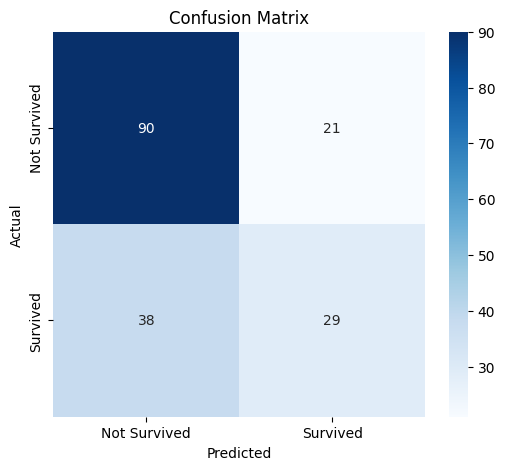


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       111
           1       0.58      0.43      0.50        67

    accuracy                           0.67       178
   macro avg       0.64      0.62      0.62       178
weighted avg       0.66      0.67      0.66       178



In [22]:
# Step 1: Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 3: Display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Display classification report
report = classification_report(y_test, y_test_pred)
print("\n📊 Classification Report:\n", report)



## Section 5: Try Another Model

### **Task 5**:  Random Forest Classifier

*Instruction*: Train a `RandomForestClassifier` and compare its performance with Logistic Regression.


🔍 Logistic Regression Accuracy on Training Data: 70.52%
🔍 Logistic Regression Accuracy on Testing Data: 66.85%

🔍 Random Forest Model Accuracy on Training Data: 97.18%
🔍 Random Forest Model Accuracy on Testing Data: 65.17%


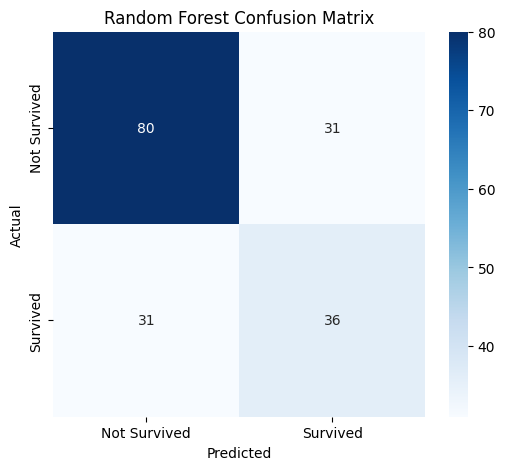


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       111
           1       0.54      0.54      0.54        67

    accuracy                           0.65       178
   macro avg       0.63      0.63      0.63       178
weighted avg       0.65      0.65      0.65       178



In [26]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

# Step 3: Make predictions using the Logistic Regression model
y_lr_pred = lr_model.predict(X_test)

# Step 4: Calculate accuracy for Logistic Regression
lr_accuracy_train = accuracy_score(y_train, lr_model.predict(X_train))
lr_accuracy_test = accuracy_score(y_test, y_lr_pred)

# Step 5: Display the results
print("🔍 Logistic Regression Accuracy on Training Data: {:.2f}%".format(lr_accuracy_train * 100))
print("🔍 Logistic Regression Accuracy on Testing Data: {:.2f}%".format(lr_accuracy_test * 100))

# Step 6: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 7: Make predictions using the Random Forest model
y_rf_pred = rf_model.predict(X_test)

# Step 8: Calculate accuracy for Random Forest
rf_accuracy_train = accuracy_score(y_train, rf_model.predict(X_train))
rf_accuracy_test = accuracy_score(y_test, y_rf_pred)

# Step 9: Display Random Forest Results
print("\n🔍 Random Forest Model Accuracy on Training Data: {:.2f}%".format(rf_accuracy_train * 100))
print("🔍 Random Forest Model Accuracy on Testing Data: {:.2f}%".format(rf_accuracy_test * 100))

# Step 10: Confusion Matrix and Classification Report (Optional)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Random Forest Classification Report
print("\n📊 Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))



## Section 6: Model Tuning

### **Task 6**: Hyperparameter Tuning (GridSearch)

*Instruction*:Use `GridSearchCV` to tune `n_estimators` and `max_depth` of the Random Forest model.

In [27]:
# Step 1: Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 2: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30]        # Maximum depth of the trees
}

# Step 3: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Step 5: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 6: Display the best parameters and best model
print("\n🎯 Best Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

# Step 7: Get the best model
best_rf_model = grid_search.best_estimator_

# Step 8: Make predictions using the tuned model
y_best_rf_pred = best_rf_model.predict(X_test)

# Step 9: Evaluate the performance of the tuned model
best_rf_accuracy_train = accuracy_score(y_train, best_rf_model.predict(X_train))
best_rf_accuracy_test = accuracy_score(y_test, y_best_rf_pred)

# Step 10: D


Fitting 5 folds for each of 16 candidates, totalling 80 fits

🎯 Best Hyperparameters from GridSearchCV:
{'max_depth': 10, 'n_estimators': 200}
